# RNN(LSTM) for MNIST Handwritten Digit Classification

In [46]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [47]:
def prep_pixels(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm

In [48]:
(trainX, trainY), (testX, testY) = mnist.load_data()
trainX = trainX.reshape((trainX.shape[0], 28, 28))
testX = testX.reshape((testX.shape[0], 28, 28))

In [49]:
trainX, testX = prep_pixels(trainX, testX)

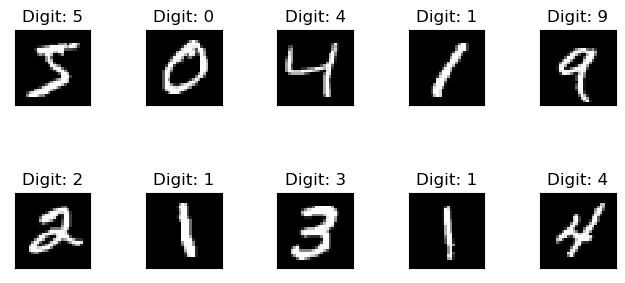

In [50]:
fig = plt.figure()
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(trainX[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(trainY[i]))
  plt.xticks([])
  plt.yticks([])


In [51]:
trainY = to_categorical(trainY,10)
testY = to_categorical(testY,10)

In [52]:
model = Sequential()
model.add(LSTM(128, input_shape=(28, 28), activation='relu', return_sequences=False))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 11s 22ms/step - loss: 0.6827 - accuracy: 0.7698 - val_loss: 0.2623 - val_accuracy: 0.9140
Epoch 2/10
469/469 [==============================] - 10s 21ms/step - loss: 0.1649 - accuracy: 0.9479 - val_loss: 0.1151 - val_accuracy: 0.9628
Epoch 3/10
469/469 [==============================] - 10s 22ms/step - loss: 0.1097 - accuracy: 0.9661 - val_loss: 0.0869 - val_accuracy: 0.9731
Epoch 4/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0866 - accuracy: 0.9724 - val_loss: 0.0954 - val_accuracy: 0.9691
Epoch 5/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0685 - accuracy: 0.9786 - val_loss: 0.0729 - val_accuracy: 0.9757
Epoch 6/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0630 - accuracy: 0.9806 - val_loss: 0.0923 - val_accuracy: 0.9692
Epoch 7/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0536 - accuracy: 0.9836 - val_loss: 0.0580 - val_accuracy:

In [54]:
score = model.evaluate(testX, testY, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 0.04553816094994545
accuracy= 0.9854999780654907


In [55]:
indices = np.random.choice(testX.shape[0], size=10, replace=False)
images = testX[indices]
labels = testY[indices]

In [56]:
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)
print('Predicted labels:', predicted_labels)

1/1 [==============================] - 0s 180ms/step
Predicted labels: [0 6 1 6 3 8 5 8 9 7]


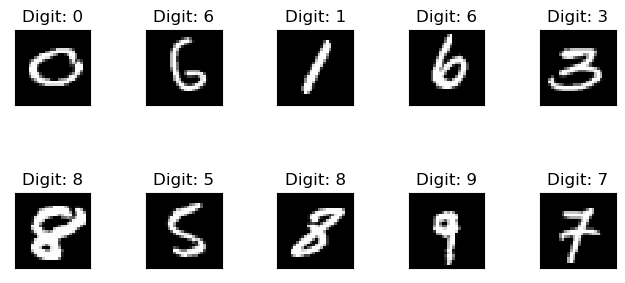

In [57]:
fig = plt.figure()
for i in range(len(predicted_labels)):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(images[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(predicted_labels[i]))
  plt.xticks([])
  plt.yticks([])
